# Rasterio Library Introduction

---

## Import the library and make a first example

In the next code space I just import the Rasterio library and in the next code space you can find some examples on how to use Rasterio.

In [43]:
# Importing the useful libraries
import rasterio
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib.pyplot as plt

# Find a file or a URL link to get a .tif file
url = "https://github.com/mapbox/rasterio/raw/main/tests/data/RGB.byte.tif"

In [44]:
# Open the raster file
with rasterio.open(url) as src:
    # Print basic information about the raster
    print("Raster width (columns):", src.width)
    print("Raster height (rows):", src.height)
    print("Number of bands:", src.count)
    print("Coordinate Reference System (CRS):", src.crs)
    print("Raster Transform (geospatial info):", src.transform)

Raster width (columns): 791
Raster height (rows): 718
Number of bands: 3
Coordinate Reference System (CRS): PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Raster Transform (geospatial info): | 300.04, 0.00, 101985.00|
| 0.00,-300.04, 2826915.00|
| 0.00, 0.00, 1.00|


In [45]:
# Open the raster file
with rasterio.open(url) as src:
    # Read the first band (bands are 1-indexed)
    band1 = src.read(1)

print(band1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


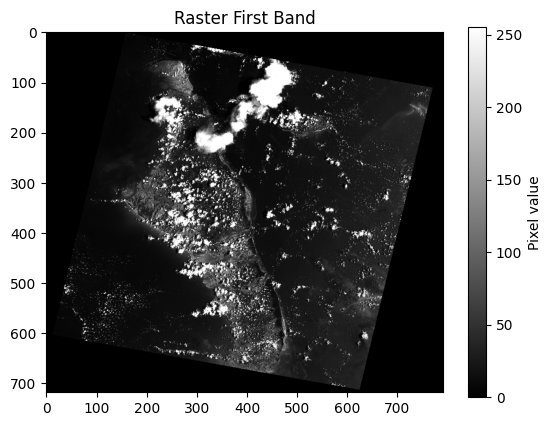

In [46]:
# Open the raster file
with rasterio.open(url) as src:
    band1 = src.read(1)

# Plot the band
plt.imshow(band1, cmap='gray')
plt.colorbar(label='Pixel value')
plt.title('Raster First Band')
plt.show()

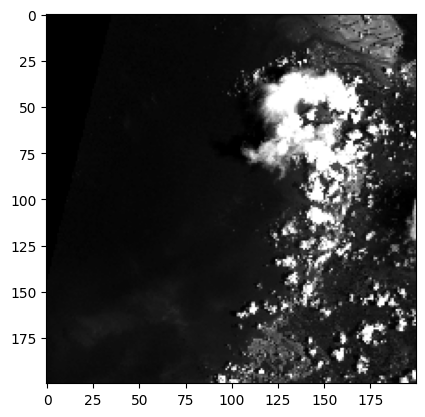

<Axes: >

In [47]:
# Open the raster
with rasterio.open(url) as src:
    # Define a window: col_off, row_off, width, height
    window = Window(100, 100, 200, 200)  # Crop a 200x200 pixel box starting from (100,100)
    cropped = src.read(1, window=window)

# Show the cropped part
show(cropped, cmap='gray')

---

## Try and use another file not stored online

Sometimes, not everything is already made and adapted for you, so you have to work to make it really work.



In [48]:
# Load the raster file
italy_data = "data/U2018_CLC2018_V2020_20u1.tif"

# Open the raster file
itd = rasterio.open(italy_data)

### Example 1: Reading a Raster File and Plotting It

{'driver': 'GTiff', 'dtype': 'int8', 'nodata': -128.0, 'width': 9942, 'height': 12807, 'count': 1, 'crs': CRS.from_wkt('PROJCS["ETRS89-extended / LAEA Europe",GEOGCS["ETRS89",DATUM["unnamed",SPHEROID["GRS 1980",6378137,298.257222101004]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Lambert_Azimuthal_Equal_Area"],PARAMETER["latitude_of_center",52],PARAMETER["longitude_of_center",10],PARAMETER["false_easting",4321000],PARAMETER["false_northing",3210000],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'), 'transform': Affine(99.99999999878408, 0.0, 4055199.9999999995,
       0.0, -100.00000000121585, 2666700.000000011), 'blockxsize': 9942, 'blockysize': 106, 'tiled': False, 'compress': 'packbits', 'interleave': 'band'}
[[[-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128 ... -128 -128 -128]
  ...
  [-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128 ... -128 -128 -128]
  [-128 -128 -128

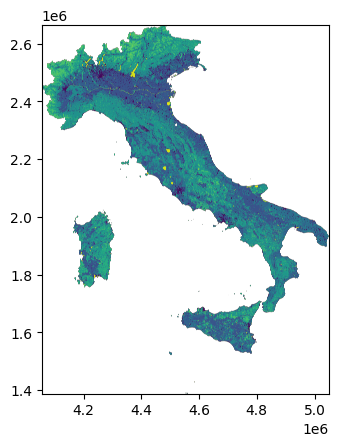

<Axes: >

In [49]:
# Show basic information about the raster
print(itd.profile)
print(itd.read())

# Show the image
show(itd)

### Example 2: Extracting a Specific Band from the Raster

Many raster files (e.g., satellite images) contain multiple bands. You can extract and plot a specific band.

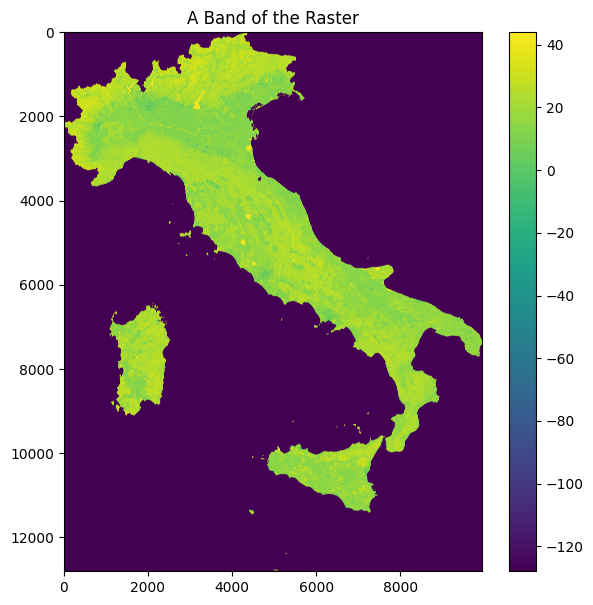

In [50]:
# Read a band
band = itd.read(1)

# Plot the band
plt.figure(figsize=(7, 7))
plt.imshow(band, cmap='viridis')
plt.colorbar()
plt.title("A Band of the Raster")
plt.show()

### Example 3: Resampling a Raster to a New Resolution

You can change the resolution of a raster (resample) using rasterio.

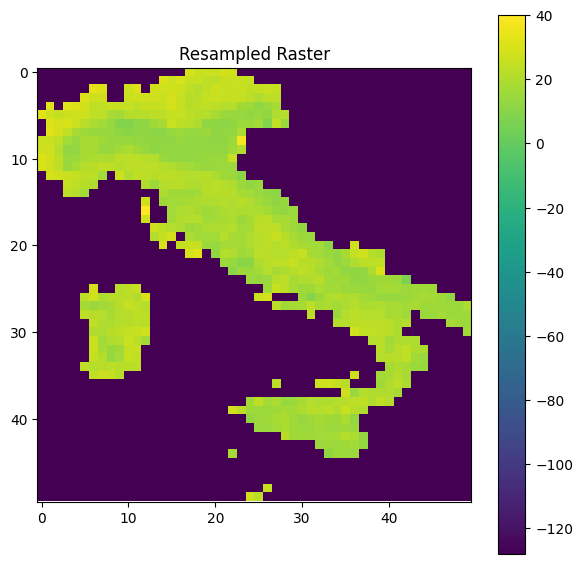

In [51]:
from rasterio.enums import Resampling

# Set the new resolution
new_resolution = (50, 50)  # new pixel size (rows, columns)

# Calculate the scaling factor
scale_x = itd.width / new_resolution[1]
scale_y = itd.height / new_resolution[0]

# Resample the raster using the average resampling method
data = itd.read(
    out_shape=(
        itd.count,
        int(itd.height / scale_y),
        int(itd.width / scale_x)
    ),
    resampling=Resampling.average
)

# Update the metadata for the new resolution
new_transform = itd.transform * itd.transform.scale(
    (itd.width / data.shape[-1]),
    (itd.height / data.shape[-2])
)

# Plot the resampled raster
plt.figure(figsize=(7, 7))
plt.imshow(data[0], cmap='viridis')
plt.colorbar()
plt.title("Resampled Raster")
plt.show()

### Example 4: Extract unique values from a raster (CLC classes)

Useful for analyzing the land use classes present.

In [52]:
import numpy as np

data = itd.read(1)

# Extract unique values (CLC classes)
unique_classes = np.unique(data)
print("Unique CLC classes in the raster:", unique_classes)

Unique CLC classes in the raster: [-128    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   40   41   42
   43   44]


### Example 5: Save a portion of the raster as a new file

If you want to save a window or region to a file.

In [53]:
# Read a window
window = Window(1000, 1000, 500, 500)
data = itd.read(1, window=window)

# Define metadata for the new raster
profile = itd.profile
profile.update({
    "height": window.height,
    "width": window.width,
    "transform": itd.window_transform(window)
})

# Write to new file
output_path = "data/cropped_raster.tif"
with rasterio.open(output_path, "w", **profile) as dst:
    dst.write(data, 1)

### Example Bonus: NDVI Calculation from Red and Near Infrared (NIR) Bandsv (to finish)

(NDVI = (NIR - RED) / (NIR + RED))

In [54]:
import numpy as np

# open red and NIR bands (must be aligned and of same shape)
#with rasterio.open("B04_red.tif") as red_src:
#    red = red_src.read(1).astype("float32")

#with rasterio.open("B08_nir.tif") as nir_src:
#    nir = nir_src.read(1).astype("float32")

# calculate NDVI
#ndvi = (nir - red) / (nir + red)
#ndvi = np.clip(ndvi, -1, 1)  # clean up outliers

# Plot NDVI
#plt.figure(figsize=(10, 6))
#ndvi_plot = plt.imshow(ndvi, cmap="RdYlGn")
#plt.colorbar(ndvi_plot, label="NDVI")
#plt.title("Normalized Difference Vegetation Index (NDVI)")
#plt.axis("off")
#plt.show()